# Clasificador de palábras con SVM
---

- **Taller 3**: Pipe-line de entrenamiento.

En esta ocasión crearán un calificador capas de identificar si una palabra pertenece al lenguaje inglés o español.

# 0. Cargue el conjunto de datos

Inicialmente, necesitará un corpus correspondiente a ambos idiomas, descárguelos (español: https://github.com/webpwnized/byepass/blob/master/dictionaries/top-10000-spanish-words.txt, inglés: https://github.com/webpwnized/byepass/blob/master/dictionaries/top-10000-english-words.txt)

Considere únicamente las palabras mayores a 4 caracteres e ignore cualquier acento

In [ ]:
%pip install ftfy

import requests
import ftfy
import re
import unicodedata
import pandas as pd

In [ ]:
# URLs de los datasets
url_spanish = "https://raw.githubusercontent.com/webpwnized/byepass/master/dictionaries/top-10000-spanish-words.txt"
url_english = "https://raw.githubusercontent.com/webpwnized/byepass/master/dictionaries/top-10000-english-words.txt"

# Importar las librerías necesarias
import requests
import ftfy
import unicodedata
import pandas as pd
import re

# Función para descargar archivos desde una URL
def download_file(url):
    """
    Descarga el contenido de un archivo desde una URL y lo devuelve como una lista de líneas.

    :param url: La URL del archivo a descargar.
    :return: Lista de líneas del archivo.
    """
    response = requests.get(url)
    response.encoding = 'utf-8'
    return response.text.splitlines()

# Descargar las listas de palabras en español e inglés
spanish_words = download_file(url_spanish)
english_words = download_file(url_english)

# Función para arreglar problemas de codificación
def fix_text_encoding(words):
    """
    Arregla problemas de codificación en una lista de palabras.

    :param words: Lista de palabras.
    :return: Lista de palabras con codificación corregida.
    """
    return [ftfy.fix_text(word) for word in words]

# Arreglar la codificación de las palabras
spanish_words = fix_text_encoding(spanish_words)
english_words = fix_text_encoding(english_words)

# Función para eliminar acentos de un texto
def remove_accents(text):
    """
    Elimina los acentos de un texto dado.

    :param text: Texto del cual se eliminarán los acentos.
    :return: Texto sin acentos.
    """
    return ''.join(char for char in unicodedata.normalize('NFD', text) if unicodedata.category(char) != 'Mn')

# Función para procesar una lista de palabras
def process_words(words):
    """
    Procesa una lista de palabras eliminando acentos y filtrando palabras con más de 4 caracteres.

    :param words: Lista de palabras a procesar.
    :return: Lista de palabras procesadas.
    """
    processed_words = []
    for word in words:
        word = remove_accents(word)
        if len(word) > 4:
            processed_words.append(word)
    return processed_words

# Procesar las listas de palabras en español e inglés
processed_spanish_words = process_words(spanish_words)
processed_english_words = process_words(english_words)

# Crear DataFrames para las palabras procesadas
df_spanish = pd.DataFrame(processed_spanish_words, columns=['Spanish_Words'])
df_english = pd.DataFrame(processed_english_words, columns=['English_Words'])

# Remover duplicados y limpiar palabras en los DataFrames
df_english['English_Words'] = df_english['English_Words'].apply(lambda x: re.sub(r'[^a-zA-Z]', '', x.lower()))
df_spanish['Spanish_Words'] = df_spanish['Spanish_Words'].apply(lambda x: re.sub(r'[^a-zA-Z]', '', x.lower()))

# Asegurar que ambos DataFrames tengan el mismo número de palabras
min_length = min(len(df_english), len(df_spanish))
df_english = df_english.sample(n=min_length, random_state=1)
df_spanish = df_spanish.sample(n=min_length, random_state=1)

In [ ]:
# Mostrar los DataFrames resultantes
df_english.head()

In [ ]:
# Mostrar los DataFrames resultantes
df_spanish.head()

# 1. Propongan un experimento (0.5)

¡Señale de forma ESCRITA!, las partes de su experimento y como plantea desarrollarlas.

**WARINING**

Por favor no tome a la ligera el punto, sea detallado y cuidadoso con su propuesta, pues sí elige mal el desarrollo de su experimento, su nota en el resto de puntos se vera afectada!!!


**Criterios de evolución**

*   Si su respuesta no está escrita, este punto equivaldrá a 0
*   Debe realizar las exploraciones necesarias que le permita obtener la información suficiente para identificar un diseño experimental correcto (ej: balance de clases, etc...).





In [ ]:
df_english.info()

In [ ]:
df_spanish.info()

## Propuesta de Experimento: Clasificación de Palabras

## Objetivo del Experimento
El objetivo de este experimento es desarrollar y evaluar un modelo de clasificación que pueda distinguir entre palabras en español y palabras en inglés. Utilizaremos n-gramas de caracteres y varios tipos de kernels para entrenar modelos de Máquina de Vectores de Soporte (SVM) y determinar cuál combinación de parámetros proporciona el mejor rendimiento.

## Hipótesis
Se espera que utilizando n-gramas y kernels adecuados, el modelo de SVM pueda clasificar correctamente las palabras en español e inglés con alta precisiónm exhaustividad y puntuaciones F1.

## Diseño Experimental

### 1. Recopilación y Preparación de Datos

#### Fuentes de Datos:
Utilizaremos dos conjuntos de datos: uno de palabras en español y otro de palabras en inglés, obtenidos de los siguientes URLs:
- Español: Top 10000 Spanish Words:
https://github.com/webpwnized/byepass/blob/master/dictionaries/top-10000-spanish-words.txt
- Inglés: Top 10000 English Words:
https://github.com/webpwnized/byepass/blob/master/dictionaries/top-10000-english-words.txt

#### Descarga y Preprocesamiento:
- Descargaremos los conjuntos de datos utilizando la librería `requests` y aseguraremos la codificación correcta.
- Procesaremos las palabras para eliminar acentos y filtrar aquellas con más de 4 caracteres.
- Normalizaremos las palabras eliminando caracteres no alfabéticos y asegurándonos de que ambos conjuntos de datos tengan el mismo número de palabras.

### 2. Generación de N-gramas y Creación de Histogramas
- Utilizaremos la función `CountVectorizer` de `sklearn` para generar n-gramas de caracteres y crear histogramas de frecuencia de n-gramas.
- Exploraremos diferentes valores de n (2, 3 y 4) para los n-gramas.

### 3. Normalización de Histogramas
- Normalizaremos los histogramas para asegurar que las frecuencias de los n-gramas sean comparables entre diferentes palabras.

### 4. División del Conjunto de Datos
- Dividiremos los datos en conjuntos de entrenamiento y prueba con una proporción de 80/20.

### 5. Entrenamiento del Modelo
- Entrenaremos modelos de SVM utilizando diferentes kernels: cosine, chi2, intersection, y min_intersection.
- Utilizaremos `GridSearchCV` para encontrar el mejor valor del hiperparámetro C para cada kernel.

### 6. Evaluación del Modelo
- Evaluaremos el rendimiento de los modelos utilizando las métricas de precisión, exhaustividad y puntuación F1.
- Compararemos los resultados para identificar la mejor combinación de parámetros y kernel.

### 7. Análisis de Errores
- Identificaremos ejemplos de errores cometidos por los modelos para entender mejor las limitaciones y posibles mejoras.

### 8. Probar el modelo

Para obtener una perspectiva adicional sobre el rendimiento del modelo, realizaremos una evaluación en 50 palabras seleccionadas aleatoriamente del conjunto de prueba.

## Resultados Esperados
Se espera que el modelo de SVM, utilizando n-gramas y el kernel adecuado, logre una alta precisión y puntuación F1 en la clasificación de palabras en inglés y español. Además, se anticipa que el análisis de errores proporcionará información valiosa para futuras mejoras en el modelo.

## Conclusión
Este experimento está diseñado para proporcionar una comprensión detallada de cómo los n-gramas y diferentes kernels pueden influir en el rendimiento de un modelo de clasificación de SVM para palabras en dos idiomas distintos. A través de la evaluación y el análisis de errores, se identificarán áreas de mejora y se obtendrán conocimientos útiles para aplicaciones lingüísticas y de procesamiento de texto.

# 2. Precalcule diferentes matrices de kernel (0.5)

Implemente diferentes kernels sobre los strings:

*   Kernel coseno sobre el histograma: calcular una bolsa de representación de n-gramas (usar el CountVectorizer de scikit-learn) y aplicar el cosine_similarity (consulte: https://keepcoding.io/blog/similitud-entre-vectores-o-cosine-similarity/)

*    Minima intersección de histograma: calcular una bolsa de n-gramas de representación, normalizarlo  y calcular la suma de los mínimos de cada bin del histograma (https://mpatacchiola.github.io/blog/2016/11/12/the-simplest-classifier-histogram-intersection.html).

*   kernel χ2 : calcular una representación de bolsa de n-gramas y aplicar el chi2_kernel de scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.chi2_kernel.html).


**FAQ**

*   ¿Por qué este kernel?, recuerde que el kernel está estrechamente asociado a la naturaleza de los datos.
*   ¿No entiendo el kernel de intersección?, en pocas palabras, imagine una matriz (tamaño 2,n). Donde cada fila corresponde al histograma de una observación. Calcule el mínimo entre filas, resultando un vector n posiciones, seguidamente sumelo!

**Criterios de evolución**

*   La función diseñada de permitir el cálculo EFICIENTE de la matriz de gram.



In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def generate_ngrams_histogram(words, n=3, vectorizer=None):
    """
    Genera histogramas de n-gramas para una lista de palabras.

    Parámetros:
    - words: Lista de palabras.
    - n: El tamaño del n-grama (por defecto es 3).
    - vectorizer: Vectorizador CountVectorizer opcional predefinido.

    Retorna:
    - histograms: Matriz de histogramas.
    - vectorizer: El vectorizador CountVectorizer utilizado.
    """
    if vectorizer is None:
        vectorizer = CountVectorizer(analyzer='char', ngram_range=(n, n))
        X = vectorizer.fit_transform(words)
    else:
        X = vectorizer.transform(words)
    histograms = X.toarray()
    return histograms, vectorizer

def normalize_histogram(histogram):
    """
    Normaliza un histograma dividiendo cada valor por la suma de los valores en la fila correspondiente.

    Parámetros:
    - histogram: El histograma a normalizar.

    Retorna:
    - El histograma normalizado.
    """
    row_sums = np.sum(histogram, axis=1, keepdims=True)
    # Reemplaza las filas con suma 0 por 1 para evitar la división por cero
    row_sums[row_sums == 0] = 1
    return histogram / row_sums

def compute_intersection_kernel(X, Y):
    """
    Calcula el kernel de intersección entre dos conjuntos de datos.

    Parámetros:
    - X: Matriz de características de la primera muestra.
    - Y: Matriz de características de la segunda muestra.

    Retorna:
    - kernel: Matriz de kernel de intersección.
    """
    m, n = X.shape[0], Y.shape[0]
    kernel = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            kernel[i, j] = np.sum(np.minimum(X[i], Y[j]))
    return kernel

In [ ]:
from sklearn.model_selection import train_test_split

# Se crea un array de etiquetas con 0 para inglés y 1 para español
labels = np.array([0] * len(df_english) + [1] * len(df_spanish))

def prepare_data(df_english, df_spanish, labels, n):
    """
    Prepara los datos dividiendo los conjuntos de datos en entrenamiento y prueba, generando histogramas de n-gramas y normalizándolos.

    Parámetros:
    - df_english: DataFrame que contiene las palabras en inglés.
    - df_spanish: DataFrame que contiene las palabras en español.
    - labels: Etiquetas para los datos, indicando el idioma (0 para inglés, 1 para español).
    - n: El tamaño del n-grama.

    Retorna:
    - X_train: Datos de entrenamiento.
    - X_test: Datos de prueba.
    - y_train: Etiquetas de entrenamiento.
    - y_test: Etiquetas de prueba.
    """

    # Se crea un vectorizador CountVectorizer
    vectorizer = CountVectorizer(analyzer='char', ngram_range=(n, n))
    vectorizer.fit(df_english['English_Words'].tolist() + df_spanish['Spanish_Words'].tolist())

    # Se generan histogramas de n-gramas para palabras en inglés y español
    english_histograms, _ = generate_ngrams_histogram(df_english['English_Words'], n, vectorizer)
    spanish_histograms, _ = generate_ngrams_histogram(df_spanish['Spanish_Words'], n, vectorizer)

    # Se concatenan los histogramas de ambas lenguas
    all_histograms = np.vstack((english_histograms, spanish_histograms))

    # Se normalizan los histogramas
    normalized_histograms = normalize_histogram(all_histograms)

    # Se dividen los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(normalized_histograms, labels, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import cosine_similarity, chi2_kernel

def train_model(X_train, y_train, kernel, C_values):
    """
    Entrena un modelo de clasificación SVM utilizando un kernel específico y una búsqueda de hiperparámetros.

    Parámetros:
    - X_train: Datos de entrenamiento.
    - y_train: Etiquetas de entrenamiento.
    - kernel: El kernel a utilizar ('cosine', 'chi2', 'intersection' o 'min_intersection').
    - C_values: Lista de valores para el hiperparámetro de regularización C.

    Retorna:
    - clf: El modelo SVM entrenado.
    """
    # Calcula la matriz de kernel según el tipo de kernel especificado
    if kernel == 'cosine':
        train_kernel = cosine_similarity(X_train)
    elif kernel == 'chi2':
        train_kernel = chi2_kernel(X_train)
    elif kernel == 'intersection' or kernel == 'min_intersection':
        train_kernel = compute_intersection_kernel(X_train, X_train)

    # Define el grid de hiperparámetros para la búsqueda
    param_grid = {'C': C_values}

    # Crea un clasificador SVM con kernel precalculado
    svc = SVC(kernel='precomputed')

    # Crea un objeto GridSearchCV para buscar el mejor valor de C
    clf = GridSearchCV(svc, param_grid, cv=5, return_train_score=True)

    # Entrena el modelo
    clf.fit(train_kernel, y_train)

    return clf

# 3. Identifique hiperparametros (1)

Utilice scikit-learn para entrenar diferentes SVMs utilizando kernels precalculados. Utilice la validación cruzada para encontrar los parámetros de regularización apropiados trazando el error de entrenamiento y validación frente al parámetro de regularización. Utilice una escala logarítmica para C {1e-5,1e-4,1e-3,1e-2, 1e-1, 1}, Pruebe diferentes configuraciones de los parámetros (en particular, diferentes valores de n para la
n-gramas).

**FAQ**

*   ¿Qué es una escala logarítmica?, como puede ver en el ejemplo, es una escala que se mueve a través de su potencia.
*   ¿profe, por qué tarda tanto?, se los advertí ._________.

**Criterios de evolución**

*   Debe presentar la exploración de hiperparámetros completa y las gráficas del desempeño del modelo, respecto a la variación del parámetro C (en total debe salir una gráfica por cada combinación de kernel y grado de n-grama).

In [ ]:
import matplotlib.pyplot as plt

def visualize_results(results, n_values, kernels):
    """
    Visualiza los resultados de la validación cruzada para diferentes valores de n y kernels.

    Parámetros:
    - results: Un diccionario que contiene los resultados de la validación cruzada.
    - n_values: Lista de valores de n para los cuales se realizaron los experimentos.
    - kernels: Lista de kernels para los cuales se realizaron los experimentos.
    """
    plt.figure(figsize=(20, 20))

    train_color = 'blue'
    test_color = 'orange'

    for i, n in enumerate(n_values):
        for j, kernel in enumerate(kernels):
            clf = results[n][kernel]
            train_scores = clf.cv_results_['mean_train_score']
            test_scores = clf.cv_results_['mean_test_score']
            C_values = clf.cv_results_['param_C'].data

            plt.subplot(len(n_values), len(kernels), i * len(kernels) + j + 1)
            plt.plot(C_values, train_scores, label='Puntaje de entrenamiento', color=train_color)
            plt.plot(C_values, test_scores, label='Puntaje de validación', color=test_color)
            plt.xscale('log')
            plt.xlabel('C')
            plt.ylabel('Puntaje')
            plt.ylim(0, 1)
            plt.title(f'n={n}, kernel={kernel}')
            plt.legend()

    plt.tight_layout()
    plt.show()

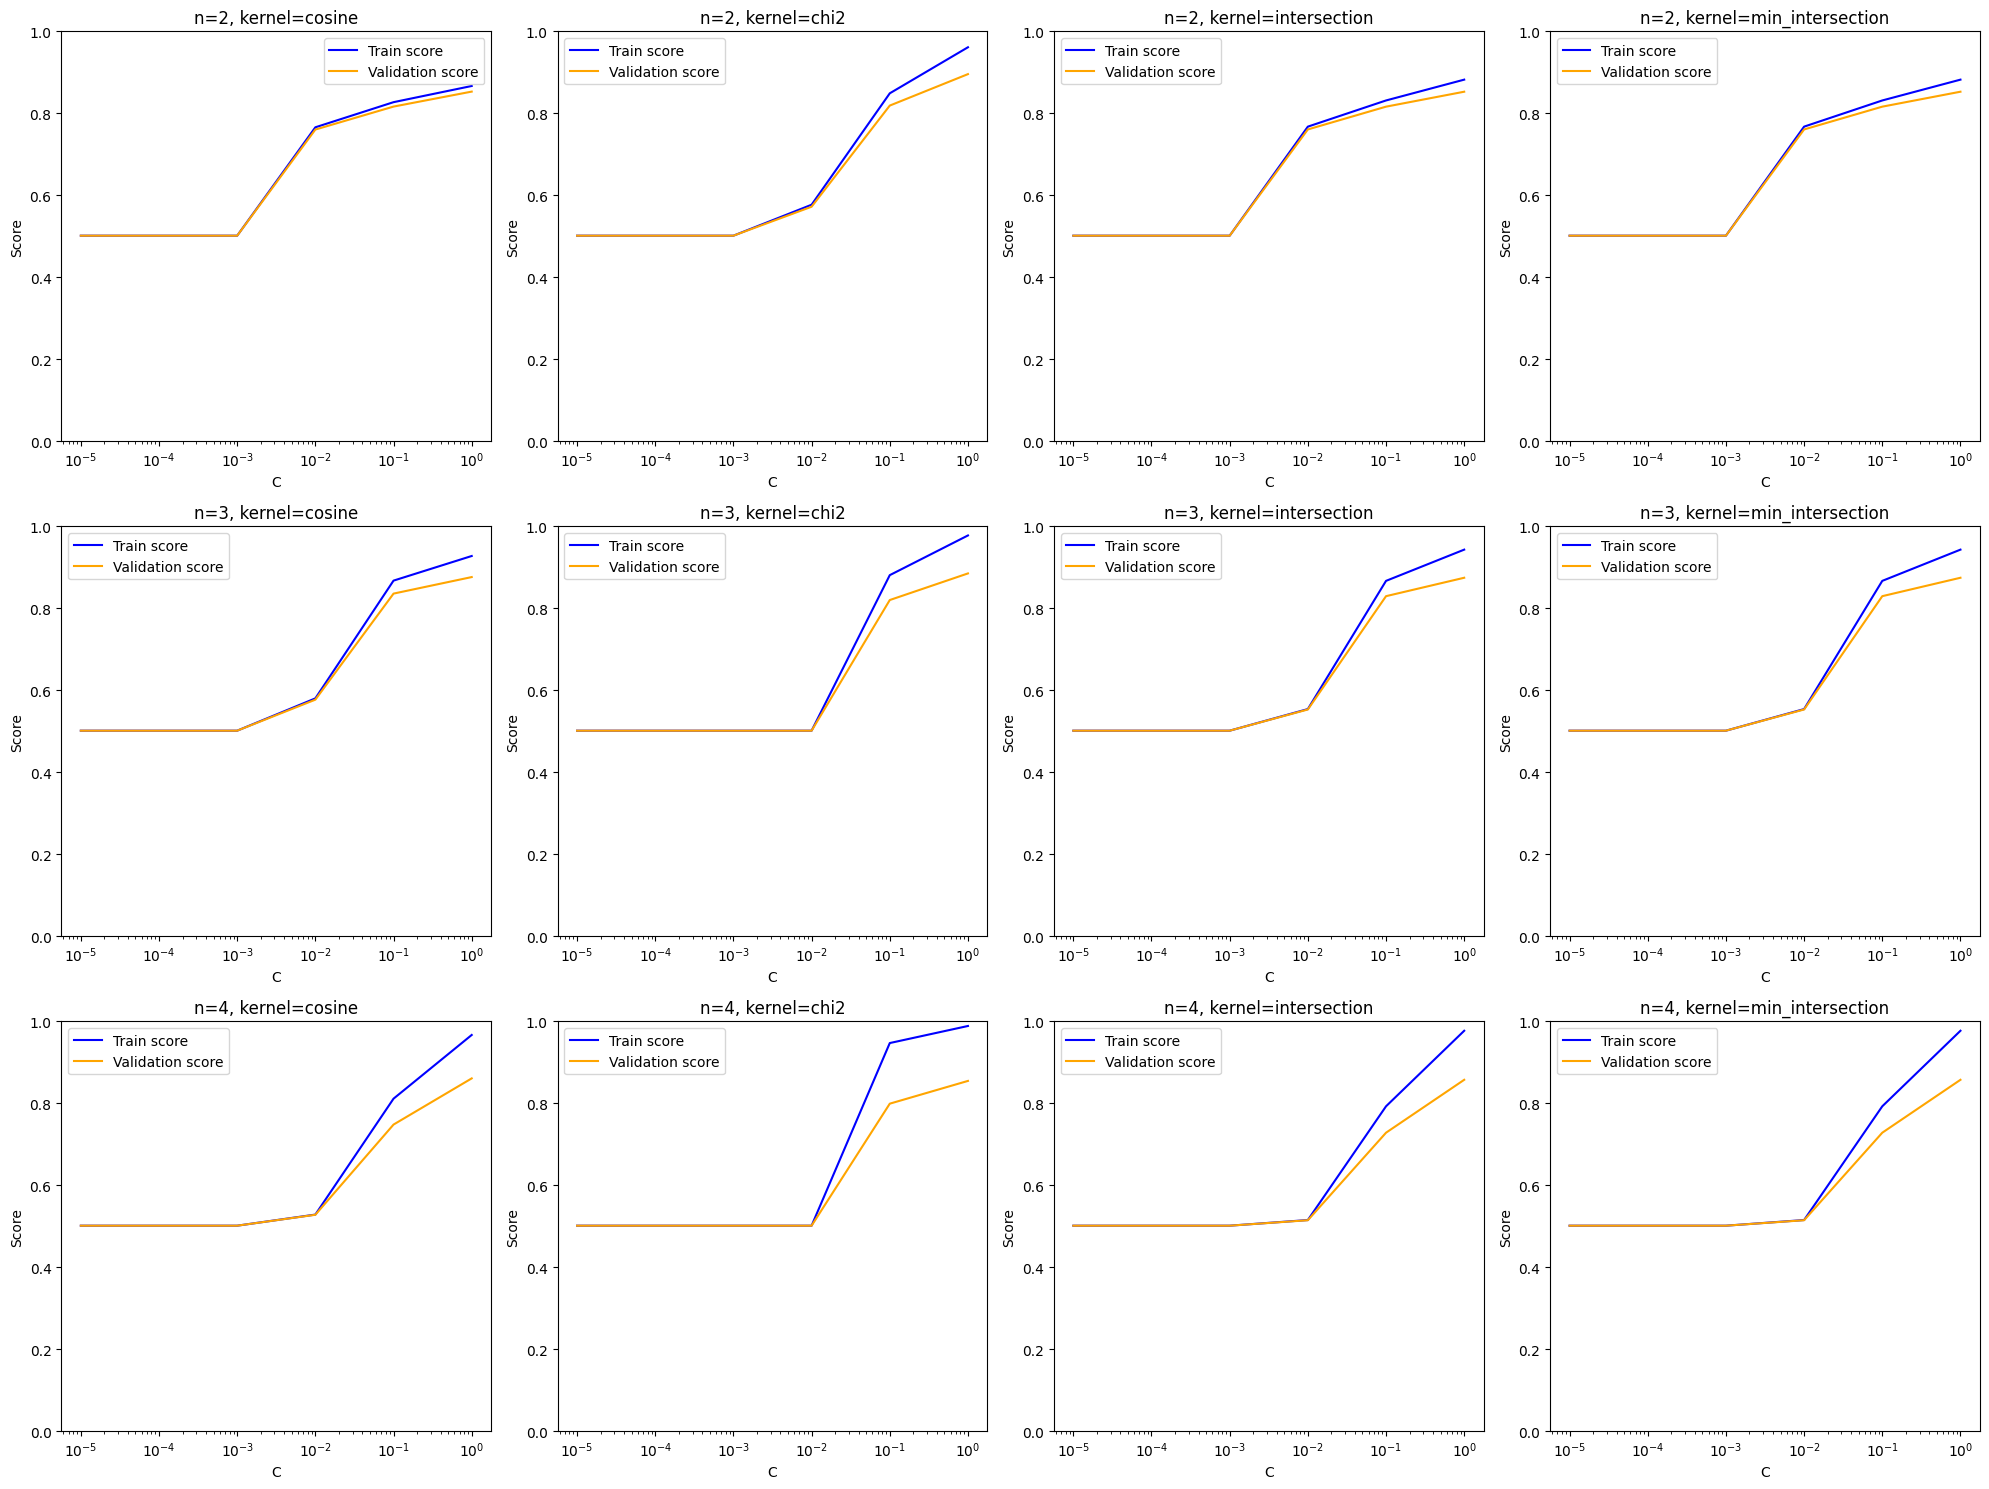

In [ ]:
n_values = [2, 3, 4]
C_values = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
kernels = ['cosine', 'chi2', 'intersection', 'min_intersection']

results = {}  # Almacena los resultados de la experimentación

def run_experiment(df_english, df_spanish, labels, n_values, kernels, C_values):
    """
    Ejecuta un experimento de clasificación utilizando diferentes valores de n y kernels, y visualiza los resultados.

    Parámetros:
    - df_english: DataFrame que contiene las palabras en inglés.
    - df_spanish: DataFrame que contiene las palabras en español.
    - labels: Etiquetas para los datos, indicando el idioma (0 para inglés, 1 para español).
    - n_values: Lista de valores de n para los cuales se realizarán los experimentos.
    - kernels: Lista de kernels para los cuales se realizarán los experimentos.
    - C_values: Lista de valores para el hiperparámetro de regularización C.
    """
    global X_train, X_test, y_train, y_test

    for n in n_values:
        results[n] = {}  # Un diccionario para almacenar los resultados para un valor particular de n
        X_train, X_test, y_train, y_test = prepare_data(df_english, df_spanish, labels, n)

        for kernel in kernels:
            clf = train_model(X_train, y_train, kernel, C_values)
            results[n][kernel] = clf  # Almacena el clasificador en los resultados para este valor de n y kernel

    # Visualiza los resultados
    visualize_results(results, n_values, kernels)

# Ejecutar el experimento
run_experiment(df_english, df_spanish, labels, n_values, kernels, C_values)

# 4. Evalue su modelo (0.5)

*   Presente los resultados en una tabla para las distintas configuraciones evaluadas.

*  Ilustre ejemplos de errores (palabras en inglés confundidas con español, palabras en español
inglés). Dé una posible explicación de estos errores.


* Discuta los resultados.

In [ ]:
from sklearn.metrics import classification_report

def evaluate_model(results, n_values, kernels, X_test, y_test):
    """
    Evalúa el modelo utilizando los datos de prueba y genera informes de clasificación para diferentes valores de n y kernels.

    Parámetros:
    - results: Un diccionario que contiene los resultados de la experimentación.
    - n_values: Lista de valores de n utilizados en la experimentación.
    - kernels: Lista de kernels utilizados en la experimentación.
    - X_test: Datos de prueba.
    - y_test: Etiquetas de prueba.

    Retorna:
    - evaluation_results: Un diccionario que contiene los informes de clasificación para diferentes valores de n y kernels.
    """
    evaluation_results = {}

    for n in n_values:
        evaluation_results[n] = {}
        for kernel in kernels:
            clf = results[n][kernel].best_estimator_  # Selecciona el mejor modelo de la búsqueda de hiperparámetros
            test_kernel = None
            if kernel == 'cosine':
                test_kernel = cosine_similarity(X_test, X_train)
            elif kernel == 'chi2':
                test_kernel = chi2_kernel(X_test, X_train)
            elif kernel == 'intersection' or kernel == 'min_intersection':
                test_kernel = compute_intersection_kernel(X_test, X_train)

            y_pred = clf.predict(test_kernel)  # Realiza predicciones en los datos de prueba
            report = classification_report(y_test, y_pred, target_names=['English', 'Spanish'], output_dict=True)  # Genera el informe de clasificación
            evaluation_results[n][kernel] = report  # Almacena el informe en los resultados

    return evaluation_results

# Evaluar el modelo
evaluation_results = evaluate_model(results, n_values, kernels, X_test, y_test)

# Presentar los resultados
print("\nResultados de evaluación:")
print("-------------------------")

# Resultados en inglés
print("\nConfiguración\t\t\tPrecision (English)\tRecall (English)\tf1_score (English)")
print("-" * 89)
for n in n_values:
    for kernel in kernels:
        precision = evaluation_results[n][kernel]['English']['precision']
        recall = evaluation_results[n][kernel]['English']['recall']
        f1_score = evaluation_results[n][kernel]['English']['f1-score']
        print(f"n={n}, kernel={kernel}\t\t{precision:.4f}\t\t\t{recall:.4f}\t\t\t{f1_score:.4f}")
print("-" * 89)

# Resultados en español
print("\nConfiguración\t\t\tPrecision (Spanish)\tRecall (Spanish)\tf1_score (Spanish)")
print("-" * 89)
for n in n_values:
    for kernel in kernels:
        precision_spanish = evaluation_results[n][kernel]['Spanish']['precision']
        recall_spanish = evaluation_results[n][kernel]['Spanish']['recall']
        f1_score_spanish = evaluation_results[n][kernel]['Spanish']['f1-score']
        print(f"n={n}, kernel={kernel}\t\t{precision_spanish:.4f}\t\t\t{recall_spanish:.4f}\t\t\t{f1_score_spanish:.4f}")
print("-" * 89)


Resultados de evaluación:

Configuración			Precision(English)	Recall(English)	f1_score
n=2, kernel=cosine		0.6413			0.8891			0.7452
n=2, kernel=chi2		0.7830			0.7852			0.7841
n=2, kernel=intersection		0.6284			0.9247			0.7483
n=2, kernel=min_intersection		0.6284			0.9247			0.7483
n=3, kernel=cosine		0.6959			0.8459			0.7636
n=3, kernel=chi2		0.9231			0.2678			0.4151
n=3, kernel=intersection		0.6971			0.8619			0.7708
n=3, kernel=min_intersection		0.6971			0.8619			0.7708
n=4, kernel=cosine		0.8642			0.8787			0.8714
n=4, kernel=chi2		0.8520			0.8870			0.8691
n=4, kernel=intersection		0.8613			0.8745			0.8678
n=4, kernel=min_intersection		0.8613			0.8745			0.8678

Configuración			Precision (Spanish)	Recall (Spanish)	f1_score (Spanish)
n=2, kernel=cosine		0.8129			0.4922			0.6131
n=2, kernel=chi2		0.7800			0.7778			0.7789
n=2, kernel=intersection		0.8516			0.4416			0.5816
n=2, kernel=min_intersection		0.8516			0.4416			0.5816
n=3, kernel=cosine		0.7982			0.6225			0.6995
n=3, kernel=chi2		0

In [ ]:
def find_errors(clf, X, y_true, original_words, target_language):
    """
    Encuentra los errores de clasificación del modelo.

    Parámetros:
    - clf: El clasificador entrenado.
    - X: Los datos de prueba (representados como kernels).
    - y_true: Las etiquetas verdaderas de los datos de prueba.
    - original_words: Las palabras originales correspondientes a los datos de prueba.
    - target_language: La etiqueta del idioma al que se confunden los errores.

    Retorna:
    - errors: Una lista de tuplas que contienen las palabras, etiquetas verdaderas y etiquetas predichas para los errores.
    """
    y_pred = clf.predict(X)
    errors = []
    for i, (true_label, pred_label) in enumerate(zip(y_true, y_pred)):
        if pred_label != true_label and pred_label == target_language:
            errors.append((original_words[i], true_label, pred_label))
    return errors

# Ejemplos de errores
print("\nEjemplos de errores:")
best_clf_by_n = {}  # Un diccionario para almacenar los mejores clasificadores por valor de n
best_kernel_by_n = {}  # Un diccionario para almacenar los mejores kernels por valor de n

# Encuentra el mejor clasificador y kernel para cada valor de n
for n in n_values:
    best_f1_score = 0
    best_kernel = None
    for kernel in kernels:
        f1_score = evaluation_results[n][kernel]['weighted avg']['f1-score']
        if f1_score > best_f1_score:
            best_f1_score = f1_score
            best_kernel = kernel
    best_clf_by_n[n] = results[n][best_kernel].best_estimator_
    best_kernel_by_n[n] = best_kernel

# Imprime los ejemplos de errores para cada valor de n
for n in n_values:
    clf = best_clf_by_n[n]
    best_kernel = best_kernel_by_n[n]

    print(f"\nMejor clasificador para n={n}: Kernel = {best_kernel}")

    # Crear lista de palabras de prueba
    test_words = df_english['English_Words'].tolist() + df_spanish['Spanish_Words'].tolist()
    _, X_test_words, _, y_test_words = train_test_split(test_words, labels, test_size=0.2, random_state=42)

    # Calcular kernels de entrenamiento y prueba
    train_kernel = cosine_similarity(X_train)
    test_kernel = cosine_similarity(X_test, X_train)

    # Encontrar errores de clasificación
    errors_english_as_spanish = find_errors(clf, test_kernel, y_test, X_test_words, target_language=1)
    errors_spanish_as_english = find_errors(clf, test_kernel, y_test, X_test_words, target_language=0)

    # Imprimir ejemplos de errores
    print("\nInglés confundido como Español:")
    for example in errors_english_as_spanish[:5]:
        print(f"Palabra: {example[0]}, Etiqueta real: {'English' if example[1] == 0 else 'Spanish'}, Etiqueta predicha: {'English' if example[2] == 0 else 'Spanish'}")

    print("\nEspañol confundido como Inglés:")
    for example in errors_spanish_as_english[:5]:
        print(f"Palabra: {example[0]}, Etiqueta real: {'English' if example[1] == 0 else 'Spanish'}, Etiqueta predicha: {'English' if example[2] == 0 else 'Spanish'}")



Ejemplos de errores:

Mejor clasificador para n=2: Kernel = chi2

Inglés confundido como Español:
Palabra: juvenile, Etiqueta real: English, Etiqueta predicha: Spanish
Palabra: wisconsin, Etiqueta real: English, Etiqueta predicha: Spanish
Palabra: informal, Etiqueta real: English, Etiqueta predicha: Spanish
Palabra: palestinian, Etiqueta real: English, Etiqueta predicha: Spanish
Palabra: destroy, Etiqueta real: English, Etiqueta predicha: Spanish

Español confundido como Inglés:
Palabra: buena, Etiqueta real: Spanish, Etiqueta predicha: English
Palabra: iluminado, Etiqueta real: Spanish, Etiqueta predicha: English
Palabra: procuraduria, Etiqueta real: Spanish, Etiqueta predicha: English
Palabra: toman, Etiqueta real: Spanish, Etiqueta predicha: English
Palabra: corbata, Etiqueta real: Spanish, Etiqueta predicha: English

Mejor clasificador para n=3: Kernel = intersection

Inglés confundido como Español:
Palabra: marathon, Etiqueta real: English, Etiqueta predicha: Spanish
Palabra: bea

### Posibles Explicaciones de los Errores

### Kernel de Coseno

**Hipótesis de Errores:**
1. **Superposición en el Espacio Vectorial:** La similitud de coseno evalúa la similitud basada en la dirección de los vectores de términos, ignorando la magnitud. Si las representaciones vectoriales de términos en inglés y español tienen direcciones similares, se clasifican erróneamente.
2. **Representación de Alta Dimensionalidad:** En n-gramas grandes (como n=4), el espacio vectorial puede ser altamente dimensional, y pequeños errores en la representación de términos pueden llevar a grandes errores en la clasificación.

### Kernel Chi-Cuadrado

**Hipótesis de Errores:**
1. **Frecuencia de Términos:** El kernel chi-cuadrado evalúa la similitud basada en la diferencia de frecuencias de términos. Si las frecuencias relativas de términos en inglés y español son similares, el modelo puede confundirse.
2. **Sensibilidad a Frecuencias Bajas:** El denominador en la fórmula puede amplificar diferencias pequeñas si las frecuencias de términos son bajas, lo que puede llevar a clasificaciones incorrectas.

### Kernel de Intersección

**Hipótesis de Errores:**
1. **Superposición de Características:** El kernel de intersección mide la cantidad de características compartidas. Si términos en inglés y español comparten muchas características, se clasifican erróneamente. Palabras como "informal" pueden tener patrones de características similares en ambos idiomas.
2. **Limitación de Diferenciación:** La intersección puede no capturar diferencias sutiles entre las distribuciones de términos en los dos idiomas, especialmente cuando hay un alto grado de similitud en los contextos en los que se utilizan los términos.

### Conclusión General

Los errores pueden atribuirse a la superposición de características entre términos en inglés y español.
- El **kernel de coseno** puede fallar debido a direcciones vectoriales similares.
- El **kernel chi-cuadrado** puede no diferenciar correctamente debido a frecuencias similares de términos en ambos idiomas.
- El **kernel de intersección** puede confundir palabras debido a características compartidas en contextos bilingües.

Estos errores sugieren que se necesitan técnicas adicionales para mejorar la separación entre los dos idiomas, como el uso de embeddings que capturen mejor el contexto lingüístico específico de cada idioma, o modelos que integren características lingüísticas más avanzadas para diferenciar mejor entre inglés y español.

In [ ]:
# Seleccionar 50 palabras aleatorias del conjunto de prueba
random_indices = np.random.choice(len(X_test_words), 8000, replace=True)
random_test_words = [X_test_words[i] for i in random_indices]
random_test_labels = [y_test_words[i] for i in random_indices]

# Calcular la similitud de coseno para las palabras de prueba aleatorias
random_test_kernel = cosine_similarity([X_test[i] for i in random_indices], X_train)

# Realizar la predicción directamente usando el clasificador entrenado
random_predictions = clf.predict(random_test_kernel)

# Obtener la configuración del SVM seleccionada
svm_configuration = f"Kernel: {best_kernel}, C: {4}"

# Imprimir los resultados
print("\nSVM Configuration:")
print("-------------------")
print(svm_configuration)
print("\nClassification Results for 8000 Randomly Selected Words:")
print("------------------------------------------------------")
# Print the table header
print("-" * 78)
print("| Word".ljust(20), "| True Label".ljust(12), "| Predicted Label".ljust(16), "|")
print("-" * 78)

# Print each row of the table
for word, true_label, pred_label in zip(random_test_words, random_test_labels, random_predictions):
    print(f"| {word.ljust(18)} | {'Spanish'.ljust(10) if true_label == 1 else 'English'.ljust(10)} "
          f"| {'Spanish'.ljust(14) if pred_label == 1 else 'English'.ljust(14)} |")

# Print the bottom border of the table
print("-" * 78)



SVM Configuration:
-------------------
Kernel: cosine, C: 4

Classification Results for 8000 Randomly Selected Words:
------------------------------------------------------
------------------------------------------------------------------------------
| Word               | True Label | Predicted Label |
------------------------------------------------------------------------------
| liquidos           | Spanish    | Spanish        |
| rolls              | English    | English        |
| marido             | Spanish    | Spanish        |
| manufactured       | English    | English        |
| rotacion           | Spanish    | Spanish        |
| symbol             | English    | English        |
| descontento        | Spanish    | Spanish        |
| norwegian          | English    | English        |
| botones            | Spanish    | Spanish        |
| isolation          | English    | English        |
| participate        | English    | Spanish        |
| ocho               | Spanish 

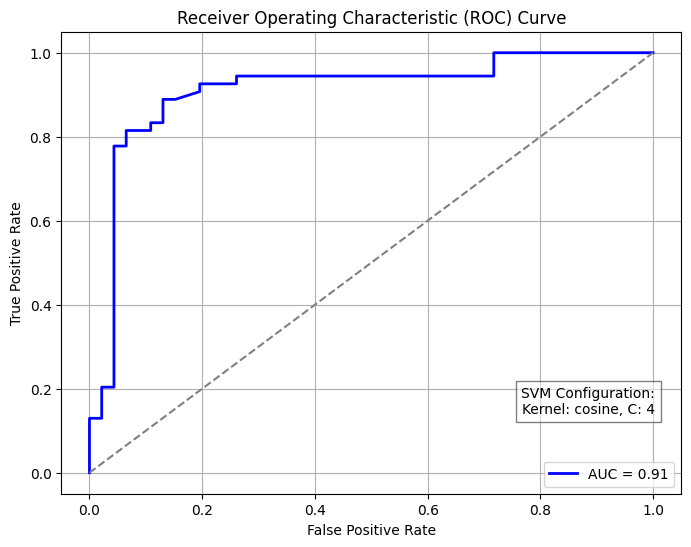

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# Obtener los puntajes de decisión
decision_scores = clf.decision_function(random_test_kernel)

# Calcular FPR y TPR
fpr, tpr, _ = roc_curve(random_test_labels, decision_scores)

# Calcular el puntaje AUC
auc_score = roc_auc_score(random_test_labels, decision_scores)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva Característica Operativa del Receptor (ROC)')

# Anotar la configuración del SVM
svm_config_text = f"Configuración del SVM:\nKernel: {best_kernel}, C: {4}"
plt.text(0.85, 0.2, svm_config_text, verticalalignment='center', horizontalalignment='center',
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.legend(loc='lower right')
plt.grid(True)
plt.show()
